<a href="https://colab.research.google.com/github/chris051091/Seminario-3/blob/master/anomalias/src/Anomalias_vizcaina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from datetime import timedelta
from functools import reduce
from math import cos, sin, atan, pi
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
PATH_DRIVE = 'drive/MyDrive/Seminario-3-master'
PATH_DADOS = '/preprocess/dados/'
PATH_DADOS_EVENTOS = '/dados/'
PATH_ANOMALIAS = '/anomalias/'
NOMBRE_ESTACION = 'vizcaina'
FILE_DATOS_ESTACION = f'eventos_{NOMBRE_ESTACION}_2.csv'

LISTA_VAR = ['temp', 'hum', 'pres']
LISTA_PWV = []
LISTA_VAR_10M = ['viento', 'prec']

PATH_FINAL_DADOS_TRATADOS = PATH_DRIVE + PATH_DADOS + NOMBRE_ESTACION + '/tratados/'
FILES_TRATADOS = [NOMBRE_ESTACION.lower() + f'_tratados_{VAR.lower()}.csv' for VAR in LISTA_VAR]
FILES_PWV = [NOMBRE_ESTACION.lower() + f'_tratados_{VAR.lower()}.csv' for VAR in LISTA_PWV]
FILES_TRATADOS_10M = [NOMBRE_ESTACION.lower() + f'_tratados_{VAR.lower()}.csv' for VAR in LISTA_VAR_10M]

Cargando datos de Temp, Hum, Pres

In [4]:
dfList = []
for f in FILES_TRATADOS:
  df = pd.read_csv(PATH_FINAL_DADOS_TRATADOS + f,
                  sep = ';', 
                )
  dfList.append(df)

In [5]:
df = reduce(lambda df1,df2: pd.merge(df1,df2,on='FECHA', how='outer'), dfList)
df = df.sort_values(by=['FECHA']).reset_index(drop = True)
df['HORA'] = df['FECHA'].apply(lambda x: x[11:13])

Cargando datos de Vapor de Agua

In [17]:
a = ['b']
b = ['cc']
a += b
a

['b', 'cc']

In [18]:
dfList = []
PWV_columns = []
if FILES_PWV:
    
  for f in FILES_PWV:
    dfp = pd.read_csv(PATH_FINAL_DADOS_TRATADOS + f,
                    sep = ';', 
                  )
    dfList.append(dfp)
    PWV += [col for col in dfp if col != 'FECHA']


  dfPWV = reduce(lambda df1,df2: pd.merge(df1,df2,on='FECHA', how='outer'), dfList)
  dfPWV = dfPWV.sort_values(by=['FECHA']).reset_index(drop = True)

  dfPWV['FECHA_HORA'] = dfPWV['FECHA'].apply(lambda x: x[0:13])
  dfPWV = dfPWV.groupby('FECHA_HORA').agg('mean').reset_index()

  for var in LISTA_PWV:
    dfPWV = dfPWV.loc[~dfPWV[var].isnull()].reset_index(drop = True)

  dfPWV['FECHA'] = pd.to_datetime(dfPWV['FECHA_HORA'], format='%Y-%m-%d %H').dt.tz_localize('America/Bogota').astype(str)
else:
  dfPWV = pd.DataFrame(columns = ['FECHA'])

In [12]:
dfPWV

,FECHA


## Cargando datos de Vientos

$ \theta_p  = arctan(U_p / V_p) $ Direccíon del viento promedio

In [13]:
dfList = []
for f in FILES_TRATADOS_10M:
  dfaux = pd.read_csv(PATH_FINAL_DADOS_TRATADOS + f,
                  sep = ';', 
                )
  dfList.append(dfaux)

In [14]:
df10m = reduce(lambda df1,df2: pd.merge(df1,df2,on='FECHA', how='outer'), dfList)
df10m['FECHA_HORA'] = df10m['FECHA'].apply(lambda x: x[0:13])
df10m['X_VIENTO'] = df10m['VELVIENTO'] * np.cos(np.deg2rad(df10m['DIRECVIENTO']))
df10m['Y_VIENTO'] = df10m['VELVIENTO'] * np.sin(np.deg2rad(df10m['DIRECVIENTO']))

df10m = df10m.groupby('FECHA_HORA').agg({'X_VIENTO' : 'mean', 'Y_VIENTO' : 'mean', 'PREC' : 'sum' }).reset_index()
df10m['HORA'] = df10m['FECHA_HORA'].apply(lambda x: x[11:13])
df10m['FECHA'] = pd.to_datetime(df10m['FECHA_HORA'], format='%Y-%m-%d %H').dt.tz_localize('America/Bogota').astype(str)

df10mean = df10m.groupby('HORA').agg({'X_VIENTO' : 'mean', 'Y_VIENTO' : 'mean', 'PREC' : 'mean'}).reset_index()

columns_10mean = [col for col in df10mean.columns if col != 'HORA']

for col in columns_10mean:
  df10mean = df10mean.rename(columns={col : f'{col}_mean'})

# df10m['FECHA'] = pd.to_datetime(df10m['FECHA_HORA'], format='%Y-%m-%d %H').dt.tz_localize('America/Bogota').astype(str)
df10mean

,HORA,X_VIENTO_mean,Y_VIENTO_mean,PREC_mean
0,00,-0.102729,-0.041880,0.545643
1,01,-0.082350,-0.019015,0.507867
2,02,-0.079119,-0.054602,0.709861
3,03,-0.058424,-0.074648,0.705133
4,04,-0.026316,-0.033256,0.700557
5,05,-0.001397,0.006165,0.494055
6,06,-0.011292,0.029738,0.385648
7,07,-0.035193,-0.006209,0.252691
8,08,-0.000536,-0.118056,0.128033
9,09,0.142508,-0.243986,0.058818


## Cruzamiento de datos de Temp, hum y pres con PWV

In [19]:
dfDatos = pd.merge(df[['FECHA', 'TEMP', 'HUM', 'PRESION']], dfPWV[['FECHA'] + PWV_columns], on = 'FECHA', how = 'outer')
dfDatos['HORA'] = dfDatos['FECHA'].apply(lambda x: x[11:13])

dfmean = dfDatos.groupby('HORA').agg('mean').reset_index(level=0)

columns_mean = [col for col in dfmean.columns if col != 'HORA']
for col in columns_mean:
  dfmean = dfmean.rename(columns={col : f'{col}_mean'})

dfmean

,HORA,TEMP_mean,HUM_mean,PRESION_mean
0,00,24.940379,97.182825,1002.528390
1,01,24.658066,97.686138,1002.229700
2,02,24.389596,98.116690,1002.077061
3,03,24.145021,98.494845,1002.064574
4,04,23.934742,98.794035,1002.341801
5,05,23.738659,98.998600,1002.881911
6,06,23.622704,99.182158,1003.515191
7,07,24.827433,97.525376,1004.405851
8,08,26.731766,88.216884,1004.908196
9,09,29.174911,79.913592,1003.285490


In [20]:
dfEventos = pd.read_csv(PATH_DRIVE + PATH_DADOS_EVENTOS + FILE_DATOS_ESTACION, 
                 sep = ';'
                )
dfEventos = dfEventos.sort_values(by='date_min_t').reset_index(drop = True)
dfEventos['FECHA'] = pd.to_datetime(dfEventos['date_min_t'], format='%Y %m %d %H %M').dt.tz_localize('America/Bogota')
dfEventos['FECHA_MIN'] = dfEventos['FECHA'].dt.round('10min')  
dfEventos['FECHA'] = dfEventos['FECHA'].dt.round('H')
dfEventos = dfEventos[['FECHA', 'FECHA_MIN', 'min_t', 'lon_t', 'lat_t']]
dfEventos

,FECHA,FECHA_MIN,min_t,lon_t,lat_t
0,2011-02-13 05:00:00-05:00,2011-02-13 05:20:00-05:00,204.5,-73.693,7.058
1,2011-03-09 01:00:00-05:00,2011-03-09 01:20:00-05:00,216.9,-73.693,6.915
2,2011-04-23 20:00:00-05:00,2011-04-23 20:20:00-05:00,196.2,-73.693,6.915
3,2011-04-25 01:00:00-05:00,2011-04-25 01:20:00-05:00,199.6,-73.693,6.772
4,2011-06-07 05:00:00-05:00,2011-06-07 05:20:00-05:00,193.6,-73.693,7.058
5,2011-06-19 04:00:00-05:00,2011-06-19 04:20:00-05:00,205.3,-73.693,7.058
6,2011-07-01 00:00:00-05:00,2011-07-01 00:20:00-05:00,188.4,-73.693,7.058
7,2011-07-19 02:00:00-05:00,2011-07-19 01:40:00-05:00,209.0,-73.693,6.772
8,2011-07-19 02:00:00-05:00,2011-07-19 01:40:00-05:00,209.0,-73.693,6.772
9,2011-08-15 03:00:00-05:00,2011-08-15 02:40:00-05:00,194.3,-73.693,7.058


In [39]:
funtime = lambda x, hour : [x + timedelta(hours = h) for h in (range(0, hour+1) if hour > 0 else range(hour, 0))]

# [base - datetime.timedelta(days=x) for x in range(numdays)]
dfEventAn = dfEventos.copy()
# pd.set_option('display.max_colwidth', None)

# ==================================
int_horas = 6
# ==================================
dfEventAn['FECHA_ANTES'] = dfEventAn['FECHA'].apply(funtime, hour = -int_horas)
dfEventAn['FECHA_DESPUES'] = dfEventAn['FECHA'].apply(funtime, hour = int_horas)
dfEventAn['FECHA_INTERVALO'] = dfEventAn['FECHA_ANTES'] + dfEventAn['FECHA_DESPUES']
dfEventAn = dfEventAn.drop(columns=['FECHA_ANTES', 'FECHA_DESPUES']).explode('FECHA_INTERVALO')
dfEventAn['FECHA_POS'] = (dfEventAn['FECHA_INTERVALO'] - dfEventAn['FECHA'])/ pd.Timedelta(hours=1)
dfEventAn = dfEventAn.rename(columns={'FECHA' : 'FECHA_EVENTO', 'FECHA_INTERVALO': 'FECHA'}).reset_index()
dfEventAn['FECHA'] = dfEventAn['FECHA'].astype(str)


dfEventAn.head(15)

,index,FECHA_EVENTO,FECHA_MIN,min_t,lon_t,lat_t,FECHA,FECHA_POS
0,0,2011-02-13 05:00:00-05:00,2011-02-13 05:20:00-05:00,204.5,-73.693,7.058,2011-02-12 23:00:00-05:00,-6.0
1,0,2011-02-13 05:00:00-05:00,2011-02-13 05:20:00-05:00,204.5,-73.693,7.058,2011-02-13 00:00:00-05:00,-5.0
2,0,2011-02-13 05:00:00-05:00,2011-02-13 05:20:00-05:00,204.5,-73.693,7.058,2011-02-13 01:00:00-05:00,-4.0
3,0,2011-02-13 05:00:00-05:00,2011-02-13 05:20:00-05:00,204.5,-73.693,7.058,2011-02-13 02:00:00-05:00,-3.0
4,0,2011-02-13 05:00:00-05:00,2011-02-13 05:20:00-05:00,204.5,-73.693,7.058,2011-02-13 03:00:00-05:00,-2.0
5,0,2011-02-13 05:00:00-05:00,2011-02-13 05:20:00-05:00,204.5,-73.693,7.058,2011-02-13 04:00:00-05:00,-1.0
6,0,2011-02-13 05:00:00-05:00,2011-02-13 05:20:00-05:00,204.5,-73.693,7.058,2011-02-13 05:00:00-05:00,0.0
7,0,2011-02-13 05:00:00-05:00,2011-02-13 05:20:00-05:00,204.5,-73.693,7.058,2011-02-13 06:00:00-05:00,1.0
8,0,2011-02-13 05:00:00-05:00,2011-02-13 05:20:00-05:00,204.5,-73.693,7.058,2011-02-13 07:00:00-05:00,2.0
9,0,2011-02-13 05:00:00-05:00,2011-02-13 05:20:00-05:00,204.5,-73.693,7.058,2011-02-13 08:00:00-05:00,3.0


In [40]:
dfCross = pd.merge(dfEventAn, dfDatos, on='FECHA', how = 'left')
dfCross['HORA'] = dfCross['FECHA'].apply(lambda x: x[11:13])
dfCross = pd.merge(dfCross, dfmean, on = 'HORA', how='left')

list_anomalias = []
for col in columns_mean:
  anomalia = f'{col}_anomalia'
  list_anomalias.append(anomalia)
  dfCross[anomalia] = dfCross[f'{col}'] - dfCross[f'{col}_mean'] 

dfAnomalia = dfCross[list_anomalias + ['FECHA_POS']].groupby('FECHA_POS').agg(['mean', 'std']).reset_index()

In [41]:
dfAnomalia

FECHA_POS TEMP_anomalia            ... HUM_anomalia PRESION_anomalia          
                      mean       std  ...          std             mean       std
0       -6.0      0.684933  1.305302  ...     6.424375        -1.388499  1.523728
1       -5.0      0.545384  1.314691  ...     7.417371        -1.228140  1.660208
2       -4.0      0.436687  0.970946  ...     6.204664        -1.514169  1.540589
3       -3.0      0.572162  0.872019  ...     4.981313        -1.615179  1.572097
4       -2.0      0.637224  0.749931  ...     5.072356        -1.061479  3.414321
5       -1.0      0.490207  0.724360  ...     3.239644        -1.949233  1.466341
6        0.0      0.154805  1.071114  ...     2.909260        -1.630833  1.911505
7        1.0     -0.257778  1.209719  ...     3.951062        -1.748815  1.865688
8        2.0     -0.509879  1.021251  ...     3.440603        -1.450860  2.021517
9        3.0     -0.682358  1.431416  ...     5.955865        -0.452696  3.533626
10       4.0     -0.866734  1.953887  ...     8.256050         0.295160  3.687665
11       5.0     -0.806822  1.535680  ...     7.335078         0.007916  3.761082
12       6.0     -1.017089  1.529016  ...     6.232594        -0.059599  2.760951

[13 rows x 7 columns]

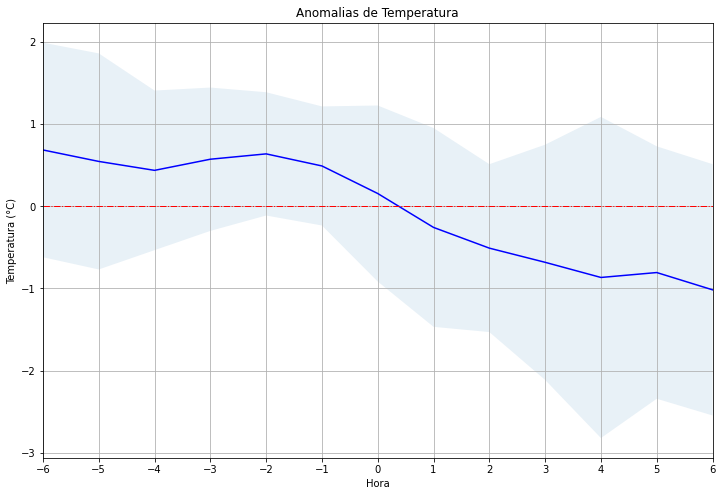

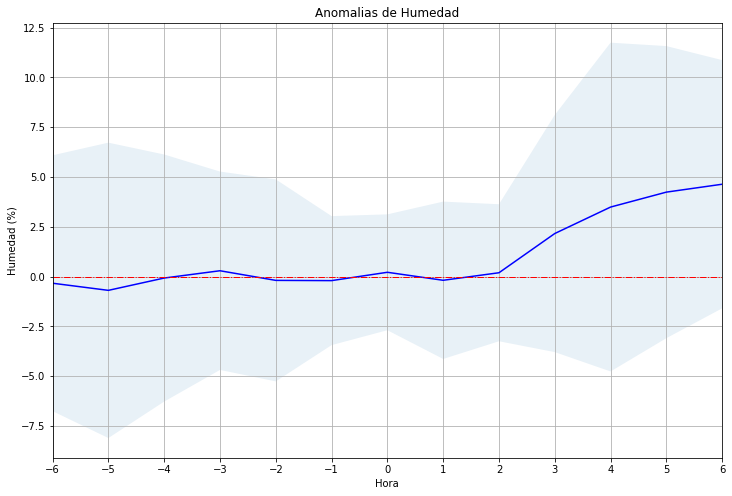

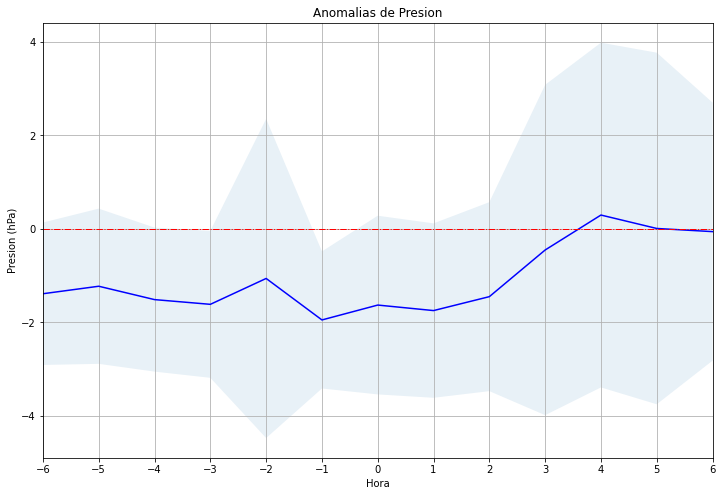

In [42]:
def plot_anomalias(df, anomalia, titulo, name_to_save, ylabel_name, int_horas, ylimit = []):
  plt.figure(figsize = (12,8))

  df['FECHA_POS'] = df['FECHA_POS'].astype(int)
  df['CERO'] = 0
  plt.xticks(df['FECHA_POS'])
  plt.plot(df['FECHA_POS'], df[(anomalia, 'mean')], color = 'b')
  plt.fill_between(df['FECHA_POS'], df[(anomalia, 'mean')] + df[(anomalia, 'std')], df[(anomalia, 'mean')] - df[(anomalia, 'std')], alpha=.1, linestyle = '--', linewidth = 0.5)
  plt.plot(df['FECHA_POS'], df['CERO'], color = 'r', linestyle = '-.', linewidth = 1)
  plt.grid()
  plt.xlim([-int_horas, int_horas])
  if ylimit:
    plt.ylim(*ylimit)
  plt.xlabel("Hora")
  plt.ylabel(ylabel_name)
  plt.title(titulo)

  plt.savefig(PATH_DRIVE + PATH_ANOMALIAS + f'{NOMBRE_ESTACION}/'  + name_to_save, format='png', bbox_inches = 'tight' )

dict_names = {'TEMP_anomalia' : {'title' : 'Anomalias de Temperatura', 'name2save' : f'anomalias_temperatura_{NOMBRE_ESTACION}_{int_horas}h.png', 'ylabel' : 'Temperatura (°C)'},
              'HUM_anomalia' : {'title' : 'Anomalias de Humedad', 'name2save' : f'anomalias_humedad_{NOMBRE_ESTACION}_{int_horas}h.png', 'ylabel' : 'Humedad (%)'},
              'PRESION_anomalia' : {'title' : 'Anomalias de Presion', 'name2save' : f'anomalias_presion_{NOMBRE_ESTACION}_{int_horas}h.png', 'ylabel' : 'Presion (hPa)'},
              # 'PWV_anomalia' : {'title' : 'Anomalias de Vapor de agua', 'name2save' : f'anomalias_pwv_{NOMBRE_ESTACION}_{int_horas}h.png', 'ylabel' : 'Vapor de agua (mm)'}
    }

for key in dict_names:
  plot_anomalias(dfAnomalia, key, dict_names[key]['title'], dict_names[key]['name2save'], dict_names[key]['ylabel'], int_horas)

# dfAnomalia

## Análisis con los eventos que tienen todas las variábles metereológicas completas

In [43]:
dfEventos0 = dfCross.loc[dfCross['FECHA_POS'] == 0.]
dfEventos0 = dfEventos0[['FECHA_EVENTO', 'min_t', 'index'] + columns_mean]
dfEventos0['NUMERO_VARS'] = dfEventos0[columns_mean].notnull().sum(axis=1)
dfEventos0

,FECHA_EVENTO,min_t,index,TEMP,HUM,PRESION,NUMERO_VARS
6,2011-02-13 05:00:00-05:00,204.5,0,24.2,96.0,NaN,2
19,2011-03-09 01:00:00-05:00,216.9,1,24.9,99.0,NaN,2
32,2011-04-23 20:00:00-05:00,196.2,2,NaN,NaN,NaN,0
45,2011-04-25 01:00:00-05:00,199.6,3,NaN,NaN,NaN,0
58,2011-06-07 05:00:00-05:00,193.6,4,24.9,100.0,NaN,2
71,2011-06-19 04:00:00-05:00,205.3,5,25.0,99.0,NaN,2
84,2011-07-01 00:00:00-05:00,188.4,6,21.1,100.0,NaN,2
97,2011-07-19 02:00:00-05:00,209.0,7,25.5,100.0,NaN,2
110,2011-07-19 02:00:00-05:00,209.0,8,25.5,100.0,NaN,2
123,2011-08-15 03:00:00-05:00,194.3,9,22.6,99.0,NaN,2


In [44]:
dfEventos0.count()

FECHA_EVENTO    39
min_t           39
index           39
TEMP            31
HUM             31
PRESION         20
NUMERO_VARS     39
dtype: int64

In [45]:
dfEventos0['NUMERO_VARS'].value_counts()

3    20
2    11
0     8
Name: NUMERO_VARS, dtype: int64

In [46]:
dfVarsCompletas = dfEventos0.loc[dfEventos0['NUMERO_VARS'] == 3]
indexVarsCompletas = dfVarsCompletas['index']
dfVarsComp = pd.merge(dfCross, indexVarsCompletas, on = 'index', how = 'inner')

dfAnomaliaVarsComp = dfVarsComp[list_anomalias + ['FECHA_POS']].groupby('FECHA_POS').agg(['mean', 'std']).reset_index()
dfAnomaliaVarsComp

FECHA_POS TEMP_anomalia            ... HUM_anomalia PRESION_anomalia          
                      mean       std  ...          std             mean       std
0       -6.0      0.908722  1.494828  ...     7.361755        -1.388499  1.523728
1       -5.0      0.805964  1.512737  ...     7.778650        -1.408335  1.477700
2       -4.0      0.585141  1.108299  ...     7.087197        -1.514169  1.540589
3       -3.0      0.746378  0.942390  ...     5.680054        -1.615179  1.572097
4       -2.0      0.814817  0.703217  ...     5.848520        -1.714298  1.688338
5       -1.0      0.580800  0.713602  ...     3.564177        -1.949233  1.466341
6        0.0      0.302581  0.747145  ...     3.388008        -1.630833  1.911505
7        1.0     -0.055969  1.105637  ...     4.723116        -1.748815  1.865688
8        2.0     -0.158089  0.838915  ...     4.124308        -1.573110  1.992798
9        3.0     -0.184444  1.112443  ...     5.852071        -1.178703  2.173372
10       4.0     -0.284268  1.562154  ...     7.306805        -0.477821  2.499164
11       5.0     -0.553157  1.563687  ...     6.648921        -0.614598  2.514743
12       6.0     -0.807020  1.625517  ...     6.673945        -0.059599  2.760951

[13 rows x 7 columns]

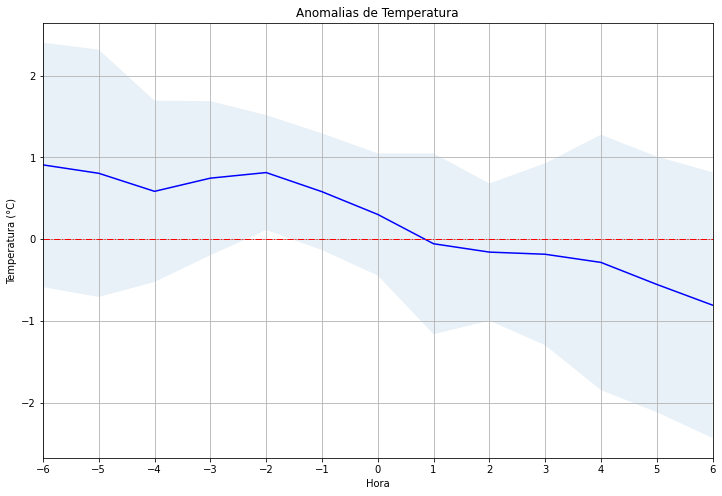

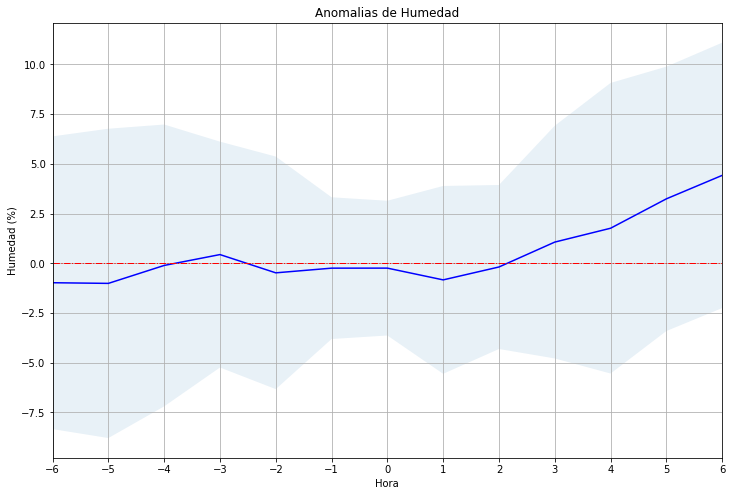

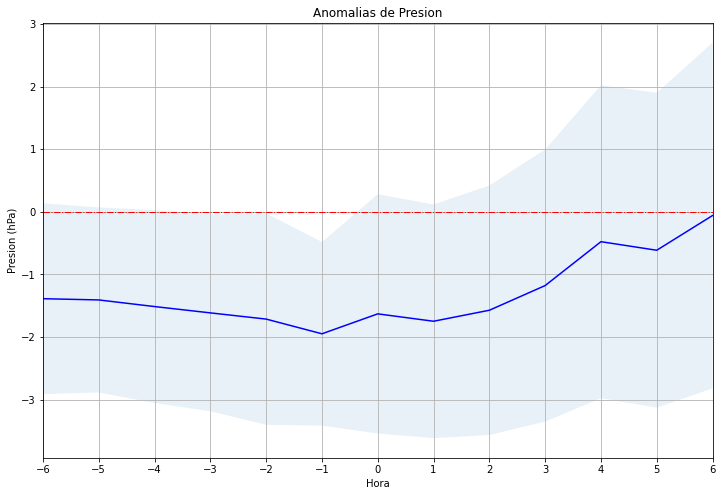

In [47]:
dict_names = {'TEMP_anomalia' : {'title' : 'Anomalias de Temperatura', 'name2save' : f'anomalias_temperatura_vars_comp_{NOMBRE_ESTACION}_{int_horas}h.png', 'ylabel' : 'Temperatura (°C)'},
              'HUM_anomalia' : {'title' : 'Anomalias de Humedad', 'name2save' : f'anomalias_humedad_vars_comp_{NOMBRE_ESTACION}_{int_horas}h.png', 'ylabel' : 'Humedad (%)'},
              'PRESION_anomalia' : {'title' : 'Anomalias de Presion', 'name2save' : f'anomalias_presion_vars_comp_{NOMBRE_ESTACION}_{int_horas}h.png', 'ylabel' : 'Presion (hPa)'},
              # 'PWV_anomalia' : {'title' : 'Anomalias de Vapor de agua', 'name2save' : f'anomalias_pwv_vars_comp_{NOMBRE_ESTACION}_{int_horas}h.png', 'ylabel' : 'Vapor de agua (mm)'}
    }

for key in dict_names:
  plot_anomalias(dfAnomaliaVarsComp, key, dict_names[key]['title'], dict_names[key]['name2save'], dict_names[key]['ylabel'], int_horas)

## Análisis para Dirección del Viento 

In [48]:
func_dir = lambda df, x, y: np.rad2deg(np.arctan2(df[y], df[x])) if np.arctan2(df[y], df[x]) > 0 else 360 + np.rad2deg(np.arctan2(df[y], df[x]))
func_vel = lambda df, x, y: (df[x]**2 + df[y]**2)**(1/2)

df10mean['DIRVIENTO_mean'] = df10mean.apply(func_dir, x = 'X_VIENTO_mean', y='Y_VIENTO_mean', axis=1)
df10mean['VELVIENTO_mean'] = df10mean.apply(func_vel, x = 'X_VIENTO_mean', y='Y_VIENTO_mean', axis=1)
df10m['DIRVIENTO'] = df10m.apply(func_dir, x = 'X_VIENTO', y='Y_VIENTO', axis=1)
df10m['VELVIENTO'] = df10m.apply(func_vel, x = 'X_VIENTO', y='Y_VIENTO', axis=1)

In [49]:
dfCross10m = pd.merge(dfEventAn, df10m, on='FECHA', how = 'left')
dfCross10m['HORA'] = dfCross10m['FECHA'].apply(lambda x: x[11:13])
dfCross10m = pd.merge(dfCross10m, df10mean, on = 'HORA', how='left')

list_anomalias_10m = []
for col in ['X_VIENTO', 'Y_VIENTO']:
  anomalia = f'{col}_anomalia'
  list_anomalias_10m.append(anomalia)
  dfCross10m[anomalia] = dfCross10m[f'{col}'] - dfCross10m[f'{col}_mean'] 

# func_norm_360 = lambda df, x : df[x] + 360 if df[x] < 0 else df[x]
# dfCross10m['DIRVIENTO_anomalia'] = dfCross10m.apply(func_norm_360, x = 'DIRVIENTO_anomalia', axis=1)
# dfCross10m[dfCross10m['FECHA_POS'] == -6]
dfAnomalia_10m = dfCross10m[list_anomalias_10m + ['FECHA_POS']].groupby('FECHA_POS').agg(['mean', 'std']).reset_index()


dfAnomalia_10m['DIRVIENTO_anomalia_mean'] = dfAnomalia_10m.apply(func_dir, x = ('X_VIENTO_anomalia', 'mean'), y=('Y_VIENTO_anomalia', 'mean'), axis=1)
dfAnomalia_10m['VELVIENTO_anomalia_mean'] = dfAnomalia_10m.apply(func_vel, x = ('X_VIENTO_anomalia', 'mean'), y=('Y_VIENTO_anomalia', 'mean'), axis=1)

dfAnomalia_10m['DIRVIENTO_anomalia_std'] = dfAnomalia_10m.apply(func_dir, x = ('X_VIENTO_anomalia', 'std'), y=('Y_VIENTO_anomalia', 'std'), axis=1)
dfAnomalia_10m['VELVIENTO_anomalia_std'] = dfAnomalia_10m.apply(func_vel, x = ('X_VIENTO_anomalia', 'std'), y=('Y_VIENTO_anomalia', 'std'), axis=1)

dfAnomalia_10m

FECHA_POS X_VIENTO_anomalia  ... DIRVIENTO_anomalia_std VELVIENTO_anomalia_std
                          mean  ...                                              
0       -6.0          0.030970  ...              35.522642               0.818308
1       -5.0         -0.024415  ...              36.200121               0.697731
2       -4.0          0.029966  ...              34.208953               0.755859
3       -3.0          0.455575  ...              42.822991               0.887502
4       -2.0          0.256155  ...              33.822862               0.919396
5       -1.0         -0.038183  ...              27.048306               1.240537
6        0.0          0.142277  ...              24.086210               1.404372
7        1.0         -0.141833  ...              31.927539               1.158372
8        2.0         -0.117124  ...              33.284123               0.912747
9        3.0          0.085473  ...              31.490443               0.918383
10       4.0          0.143096  ...              34.497326               0.890270
11       5.0         -0.045082  ...              36.014379               0.758707
12       6.0          0.104285  ...              32.746714               0.938793

[13 rows x 9 columns]

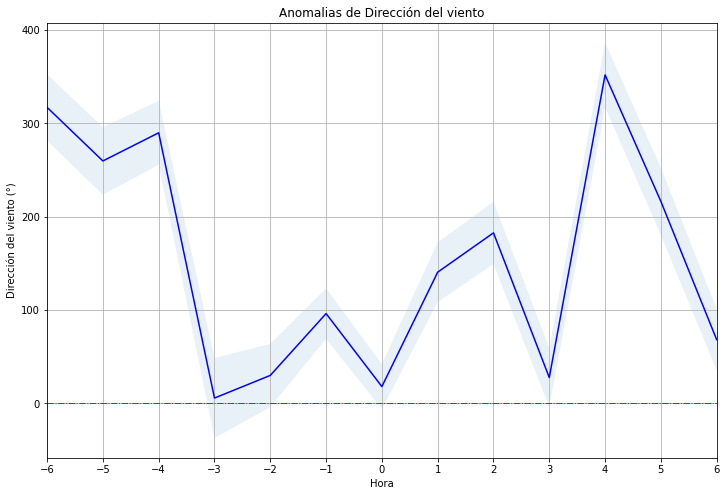

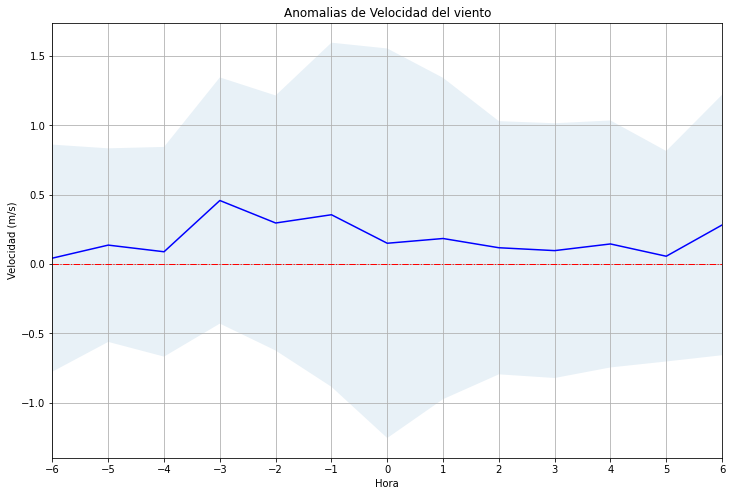

In [50]:
def plot_anomalias_2(df, col_mean, col_std, titulo, name_to_save, ylabel_name, int_horas, ylimit = []):
  plt.figure(figsize = (12,8))

  df['FECHA_POS'] = df['FECHA_POS'].astype(int)
  df['CERO'] = 0
  plt.xticks(df['FECHA_POS'])
  plt.plot(df['FECHA_POS'], df[col_mean], color = 'b')
  plt.fill_between(df['FECHA_POS'], df[col_mean] + df[col_std], df[col_mean] - df[col_std], alpha=.1, linestyle = '--', linewidth = 0.5)
  plt.plot(df['FECHA_POS'], df['CERO'], color = 'r', linestyle = '-.', linewidth = 1)
  plt.grid()
  plt.xlim([-int_horas, int_horas])
  if ylimit:
    plt.ylim(*ylimit)
  plt.xlabel("Hora")
  plt.ylabel(ylabel_name)
  plt.title(titulo)

  plt.savefig(PATH_DRIVE + PATH_ANOMALIAS + f'{NOMBRE_ESTACION}/' + name_to_save, format='png', bbox_inches = 'tight' )

dict_names = {'DIRVIENTO' : {'title' : 'Anomalias de Dirección del viento', 'name2save' : f'anomalias_dirviento_{NOMBRE_ESTACION}_{int_horas}h.png', 'ylabel' : 'Dirección del viento (°)'},
              'VELVIENTO' : {'title' : 'Anomalias de Velocidad del viento', 'name2save' : f'anomalias_velviento_{NOMBRE_ESTACION}_{int_horas}h.png', 'ylabel' : 'Velocidad (m/s)'},
            }

for key in dict_names:
  plot_anomalias_2(dfAnomalia_10m, f'{key}_anomalia_mean', f'{key}_anomalia_std', dict_names[key]['title'], dict_names[key]['name2save'], dict_names[key]['ylabel'], int_horas)